In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import seaborn as sns
from gensim.models import word2vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import pickle

pickle_file = open("C:\\Users\\snigd\\FINAL_Dataset1_Pickle.data",'rb')
## forTSNE_Data_Cleaned_08092020_083631.df
##forTSNE_Data_Cleaned_07092020_113759.df

pickle_data = pickle.load(pickle_file)
df = pd.DataFrame(pickle_data)

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df.head(5)

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,...,topicXmaxboolXcss8,topicXmaxboolXcss9,topicXmaxboolXcss10,topicXmaxboolXcss11,topicXmaxboolXcss12,topicXmaxboolXcss13,topicXmaxboolXcss14,topicXmaxboolXcss15,topicXmaxboolXcss16,topicXmaxboolXcss17
1,Instone Real Estate Group AG,Immobilien,May 2020,1,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung im Bereich Fin...,Empfohlen,Overall,4.9,Top Arbeitgeber mit vielen Benefiz Trans...,...,0,0,0,0,0,0,0.128307,0,0,0
2,Instone Real Estate Group AG,Immobilien,May 2020,2,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Rec...,Empfohlen,Overall,4.9,Vorbildlicher Arbeitgeber Nur die Mülltre...,...,-0,-0,-0,-0,-0,-0,-0.085525,-0,-0,-0
3,Instone Real Estate Group AG,Immobilien,May 2020,3,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Adm...,Empfohlen,Overall,4.5,Wenn Transparenz und Wertschätzung aufeinande...,...,0,0,0,0,0,0,0,0,0,0
4,Instone Real Estate Group AG,Immobilien,October 2019,4,Ex-Angestellte/r oder Arbeiter/in,Hat im Bereich Personal / Aus- und Weiterbildu...,Nicht empfohlen,Overall,3.2,Anspruch und Wirklichkeit klaffen auseinander...,...,0,0,0,0.0711214,0,0,0,0,0,0
5,Instone Real Estate Group AG,Immobilien,October 2019,5,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung bei Instone Re...,Empfohlen,Overall,4.8,Toller Arbeitgeber Tolle Truppe Auch bei lä...,...,0,0,0,0,0,0,0,0,0,0


In [17]:
conditions = [
    (df['score101'] > 0), (df['score101'] < 0), (df['score101'] ==0)]
choices = ['Positive', 'Negative', 'Neutral']
df['ForTSNEScore101'] = np.select(conditions, choices, default='NaN')

In [18]:
df['forTSNECity'].value_counts()

München, Bayern                  2310
NA,NA                            1821
Berlin, Berlin                   1468
Frankfurt, Brandenburg           1040
Hamburg, Hamburg                  989
                                 ... 
Witten, Nordrhein-Westfalen         1
Lübbecke, Nordrhein-Westfalen       1
Hausach, Baden-Württemberg          1
Viernheim, Hessen                   1
Erding, Bayern                      1
Name: forTSNECity, Length: 466, dtype: int64

In [19]:
df.loc[((df.forTSNECity == 'NA')), 'forTSNECity'] = 'NA,NA'

In [20]:
def Tsne_State(location):
    #location = 'Essen, Niedersachsen'
    locationAsList = location.split(",")
    return locationAsList[1].strip()

df['forTSNEState'] = df['forTSNECity'].apply(Tsne_State)

In [21]:
df.shape

(20997, 78)

In [22]:
df.columns

Index(['Org', 'OrgSector', 'RverMonthYear', 'RverReviewer', 'RverPosition',
       'RverLoc', 'RverRecom', 'RvReviewAbout', 'RvScore', 'RvComment',
       'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues',
       'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues',
       'RvScoreEnvironmentalSocialAwareness', 'Corona1', 'Corona2', 'Corona3',
       'RvScoreWorkLifeBalance', 'topic0', 'topic1', 'topic2', 'topic3',
       'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10',
       'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16',
       'topic17', 'forTSNEYear', 'forTSNECity', 'topic0_max', 'topic1_max',
       'topic2_max', 'topic3_max', 'topic4_max', 'topic5_max', 'topic6_max',
       'topic7_max', 'topic8_max', 'topic9_max', 'topic10_max', 'topic11_max',
       'topic12_max', 'topic13_max', 'topic14_max', 'topic15_max',
       'topic16_max', 'topic17_max', 'score101', 'topicXmaxboolXcss0',
       'topicXmaxboolXcss1', 'topicXmaxboolXcss

In [23]:
df.describe(include = 'all' )

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,...,topicXmaxboolXcss10,topicXmaxboolXcss11,topicXmaxboolXcss12,topicXmaxboolXcss13,topicXmaxboolXcss14,topicXmaxboolXcss15,topicXmaxboolXcss16,topicXmaxboolXcss17,forTSNEState,ForTSNEScore101
count,20997,20997,20997,20997,20997,20997,20997,20997,20997,20997,...,20997.0,20997.0,20997.0,20997.0,20997.0,20997.0,20997.0,20997.0,20997,20997
unique,147,32,128,10,14,11741,3,1,41,19801,...,1159.0,1805.0,163.0,860.0,2070.0,1244.0,1029.0,1082.0,17,3
top,Deutsche Post AG,Industrie,July 2019,4,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung bei Siemens AG...,Empfohlen,Overall,4.5,Steile Lernkurve und super Team Stark und Sc...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bayern,Positive
freq,1154,3458,1113,2162,11473,82,11692,20997,1409,4,...,19650.0,19001.0,20726.0,19947.0,18214.0,19560.0,19764.0,19691.0,4935,14685
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_1 = df[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16','topic17'#,'topic18','topic19','topic20','topic21','topic22'
            ]]
df_1.head(5)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17
1,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.392857,0.0357143,0.0357143,0.0357143
2,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.0357143,0.392857,0.0357143,0.0357143,0.0357143
3,0.14189,0,0,0,0,0,0.337175,0,0.141891,0,0,0,0,0.141893,0,0,0.0817442,0.0743245
4,0,0.224638,0,0,0,0,0,0,0,0.224632,0.0867504,0.290055,0,0,0,0,0.0797098,0
5,0.0113637,0.0113637,0.0113637,0.193402,0.0113637,0.35226,0.0113637,0.0113677,0.0113637,0.0113637,0.0113646,0.0113701,0.0113637,0.0113637,0.170235,0.124999,0.0113637,0.0113647


In [25]:
df_1.columns

Index(['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12',
       'topic13', 'topic14', 'topic15', 'topic16', 'topic17'],
      dtype='object', name=0)

In [26]:
for i in range(0, 18):
    col_name = 'topic' + str(i)
    df_1[col_name] = df_1[col_name].astype(float)
    
df_1.dtypes

0
topic0     float64
topic1     float64
topic2     float64
topic3     float64
topic4     float64
topic5     float64
topic6     float64
topic7     float64
topic8     float64
topic9     float64
topic10    float64
topic11    float64
topic12    float64
topic13    float64
topic14    float64
topic15    float64
topic16    float64
topic17    float64
dtype: object

In [27]:
result = df_1.to_numpy() 
result

array([[0.03571429, 0.03571429, 0.03571429, ..., 0.03571429, 0.03571429,
        0.03571429],
       [0.03571429, 0.03571429, 0.03571429, ..., 0.03571429, 0.03571429,
        0.03571429],
       [0.14188986, 0.        , 0.        , ..., 0.        , 0.08174422,
        0.07432454],
       ...,
       [0.03571433, 0.03571433, 0.03571433, ..., 0.03571433, 0.03571433,
        0.03571433],
       [0.02631581, 0.02631581, 0.28947333, ..., 0.02631581, 0.02631581,
        0.02631581],
       [0.03571429, 0.03571429, 0.03571429, ..., 0.03571429, 0.03571429,
        0.03571429]])

In [28]:
display(result.shape)

(20997, 18)

In [29]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=70, learning_rate=600, n_iter=2000, verbose=1, random_state=7, angle=.5, init='pca')
# 18-D -> 2-D #22-D -> 2-D
tsne_lda = tsne_model.fit_transform(result) # result is document-topic matrix from LDA

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 20997 samples in 0.250s...
[t-SNE] Computed neighbors for 20997 samples in 31.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20997
[t-SNE] Computed conditional probabilities for sample 2000 / 20997
[t-SNE] Computed conditional probabilities for sample 3000 / 20997
[t-SNE] Computed conditional probabilities for sample 4000 / 20997
[t-SNE] Computed conditional probabilities for sample 5000 / 20997
[t-SNE] Computed conditional probabilities for sample 6000 / 20997
[t-SNE] Computed conditional probabilities for sample 7000 / 20997
[t-SNE] Computed conditional probabilities for sample 8000 / 20997
[t-SNE] Computed conditional probabilities for sample 9000 / 20997
[t-SNE] Computed conditional probabilities for sample 10000 / 20997
[t-SNE] Computed conditional probabilities for sample 11000 / 20997
[t-SNE] Computed conditional probabilities for sample 12000 / 20997
[t-SNE] Computed conditional probabilities for s

In [30]:
#tsne_docXtopic.dtype
#tsne_docXtopic_dataframe = pd.DataFrame(tsne_docXtopic)
tsne_topic_dataframe = pd.DataFrame(tsne_lda)
#--------tsne_topic_dataframe['OrgSector'] = df['OrgSector']
#tsne_topic_dataframe['OrgSector'] = pd['OrgSector']
#tsne_docXtopic_dataframe
#tsne_topic_dataframe.shape
df_copy = df

In [31]:
tsne_topic_dataframe.shape

(20997, 2)

In [32]:
tsne_topic_dataframe.head(3)

,0,1
0,98.030281,13.735579
1,99.915428,12.372225
2,-0.060019,-68.267761


In [33]:
tsne_topic_dataframe_copy = tsne_topic_dataframe.copy()
#tsne_topic_dataframe.shape
#tsne_topic_dataframe.tail(2)
#top_row = pd.DataFrame({0:['delete'],1:['delete2']})
#top_row
#tsne_topic_dataframe_copy = pd.concat([top_row, tsne_topic_dataframe_copy]).reset_index(drop = True)
tsne_topic_dataframe_copy

,0,1
0,98.030281,13.735579
1,99.915428,12.372225
2,-0.060019,-68.267761
3,-71.723915,-2.770322
4,-31.578106,37.542656
...,...,...
20992,63.040604,-25.686035
20993,-80.575356,-23.797197
20994,15.677081,80.047089
20995,37.790062,-26.572176


In [34]:
df_copy.head(2)
#df_copy.shape
df_copy.tail(2)

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,...,topicXmaxboolXcss10,topicXmaxboolXcss11,topicXmaxboolXcss12,topicXmaxboolXcss13,topicXmaxboolXcss14,topicXmaxboolXcss15,topicXmaxboolXcss16,topicXmaxboolXcss17,forTSNEState,ForTSNEScore101
20996,KWS SAAT SE & Co. KGaA,Nahrungsmittel/Landwirtschaft,February 2019,5,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Fin...,Empfohlen,Overall,4.5,Sehr gute Stimmung im Team und interessante A...,...,0,0,0,0,0,0,0,0,Niedersachsen,Positive
20997,KWS SAAT SE & Co. KGaA,Nahrungsmittel/Landwirtschaft,December 2017,8,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Ver...,Empfohlen,Overall,5.0,Innovativer Arbeitgeber mit besten kollegiale...,...,0,0,0,0,0.309061,0,0,0,Niedersachsen,Positive


In [35]:
tsne_topic_dataframe_copy[0].head(3)

0    98.030281
1    99.915428
2    -0.060019
Name: 0, dtype: float32

In [36]:
tsne_topic_dataframe_copy[1].head(3)

0    13.735579
1    12.372225
2   -68.267761
Name: 1, dtype: float32

In [37]:
df_copy['x_axis']=tsne_topic_dataframe_copy[0]
df_copy['y_axis']=tsne_topic_dataframe_copy[1]

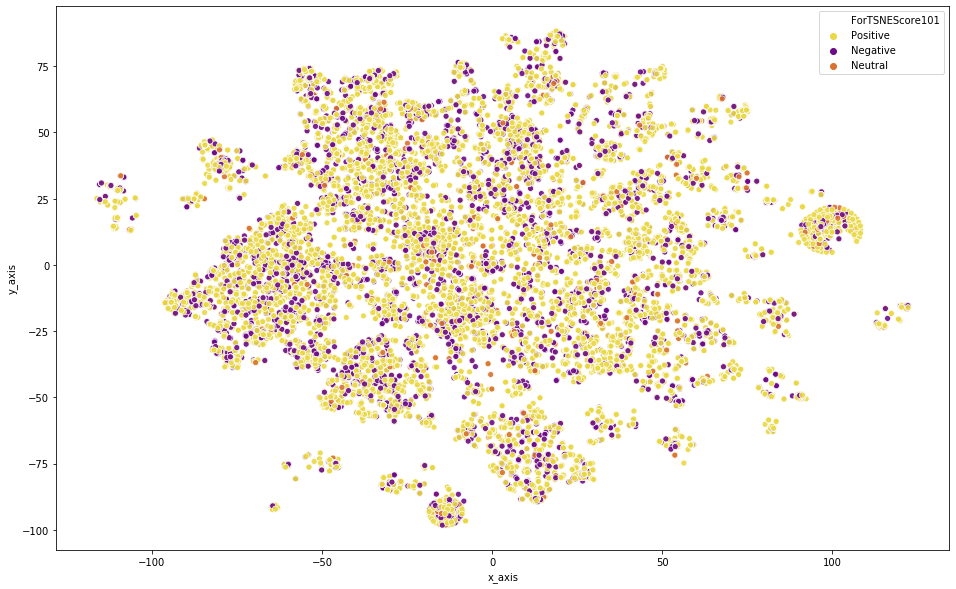

In [38]:
# reviews and ForTSNEScore101
plt.figure(figsize=(16,10))

colors = ["#ead844", "#6e0a87", "#d9722e", "#97cae4", "#b92138", "#c3c484", "#808281", "#61ae4b", "#cf7eb2", "#476bb5", "#dd8969", "#481191", "#dcab35", "#92008c", "#e6f55e", "#7d1a13", "#93b841", "#6e3715", "#d0322a", "#2b3919"]
colors2 = colors[:df_copy['ForTSNEScore101'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['ForTSNEScore101'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['forTSNEYear'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))